![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Construcción e implementación de modelos Bagging, Random Forest y XGBoost

En este taller podrán poner en práctica sus conocimientos sobre la construcción e implementación de modelos de Bagging, Random Forest y XGBoost. El taller está constituido por 8 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos predicción precio de automóviles

En este taller se usará el conjunto de datos de Car Listings de Kaggle donde cada observación representa el precio de un automóvil teniendo en cuenta distintas variables como año, marca, modelo, entre otras. El objetivo es predecir el precio del automóvil. Para más detalles puede visitar el siguiente enlace: [datos](https://www.kaggle.com/jpayne/852k-used-car-listings).

In [15]:
#librerias
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
#Random forest librerías
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


In [2]:
# Importación de librerías
%matplotlib inline
import pandas as pd

# Lectura de la información de archivo .csv
data = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/dataTrain_carListings.zip')

# Preprocesamiento de datos para el taller
data = data.loc[data['Model'].str.contains('Camry')].drop(['Make', 'State'], axis=1)
data = data.join(pd.get_dummies(data['Model'], prefix='M'))
data = data.drop(['Model'], axis=1)

# Visualización dataset
data.head()

,Price,Year,Mileage,M_Camry,M_Camry4dr,M_CamryBase,M_CamryL,M_CamryLE,M_CamrySE,M_CamryXLE
7,21995,2014,6480,0,0,0,1,0,0,0
11,13995,2014,39972,0,0,0,0,1,0,0
167,17941,2016,18989,0,0,0,0,0,1,0
225,12493,2014,51330,0,0,0,1,0,0,0
270,7994,2007,116065,0,1,0,0,0,0,0


In [3]:
# Separación de variables predictoras (X) y variable de interés (y)
y = data['Price']
X = data.drop(['Price'], axis=1)

In [4]:
# Separación de datos en set de entrenamiento y test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Punto 1 - Árbol de decisión manual

En la celda 1 creen un árbol de decisión **manualmente**  que considere los set de entrenamiento y test definidos anteriormente y presenten el RMSE y MAE del modelo en el set de test.

In [ ]:
# Celda 1
#Jesica


### Punto 2 - Bagging manual

En la celda 2 creen un modelo bagging **manualmente** con 10 árboles de clasificación y comenten sobre el desempeño del modelo.

In [22]:
# Celda 2
#Cristian
n_rows = len(X_train)
Lista_indices=[]
Predicciones = np.empty((0, len(X_test)))
N_Trees=10
for i in range(10):
    Lista_indices.append(np.random.randint(0, n_rows, n_rows))
    X_train_bootstrapped= X_train.iloc[Lista_indices[i]]
    y_train_bootstrapped=y_train.iloc[Lista_indices[i]]
    Reg_DTree = DecisionTreeRegressor(random_state=0).fit(X_train_bootstrapped,y_train_bootstrapped)
    y_pred_ind= Reg_DTree.predict(X_test)
    Predicciones = np.concatenate((Predicciones, np.expand_dims(y_pred_ind, axis=0)), axis=0)
y_pred=Predicciones.sum(axis=0)/N_Trees

MSE_bagging_manual = np.sum(np.power(y_pred-y_test,2))/len(y_pred)
RMSE_bagging_manual = np.sqrt(MSE_bagging_manual)

SSres= sum(np.power(y_pred-y_test,2))
SStot = sum(np.power(y_pred-y_test.mean(),2))

R2 =  1 - (SSres / SStot)

In [19]:
#Desempeño modelo: 
mse_bagging_manual = round(mean_squared_error(y_test, y_pred),2)
r2_bagging_manual = round(r2_score(y_test, y_pred),3)
mae_bagging_manual = round(mean_absolute_error(y_test, y_pred),2)
print("Desempeño del modelo calibrado:")
print("Mean Squared Error:", mse_bagging_manual)
print("R^2 Score:", r2_bagging_manual)
print("Mean Absolute Error (MAE):", mae_bagging_manual)


def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape_bagging_manual = round(mean_absolute_percentage_error(y_test, y_pred),2)
print("Mean Absolute Percentage Error (MAPE):", mape_bagging_manual, "%")

Desempeño del modelo calibrado:
Mean Squared Error: 3201653.76
R^2 Score: 0.791
Mean Absolute Error (MAE): 1337.49
Mean Absolute Percentage Error (MAPE): 9.72 %


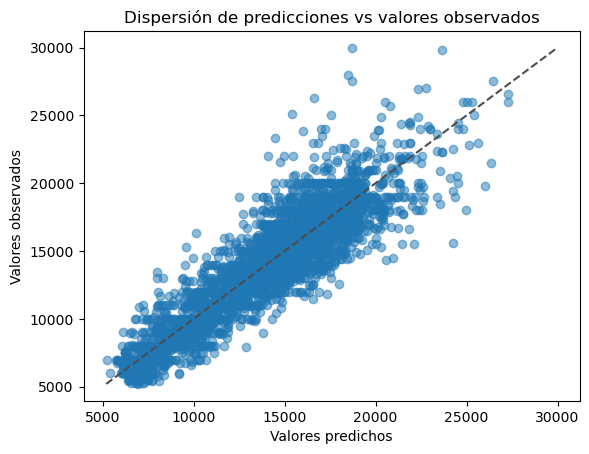

In [7]:
x_range = np.linspace(min(y_pred.min(), y_test.min()), max(y_pred.max(), y_test.max()), 1000)

fig, ax = plt.subplots()
ax.plot(x_range, x_range, ls='--', c='.3')
ax.scatter(y_pred, y_test, alpha=.5)

ax.set_xlabel('Valores predichos')
ax.set_ylabel('Valores observados')
ax.set_title('Dispersión de predicciones vs valores observados')

plt.show()

El modelo desarrollado utilizando la técnica de bagging manual con árboles de decisión tiene un error cuadrático medio (MSE)  alto, lo que sugiere que hay una  cantidad de variación en los precios de los automóviles que no se ha podido explicar con este modelo. Sin embargo, el coeficiente de determinación (R²) de 0.791 indica que el modelo es capaz de explicar el 79.1% de la variación en los precios.

El error absoluto medio (MAE) de 1337.49 indica que, en promedio, las predicciones del modelo difieren del valor real en $1337.49.

Por último, el error porcentual absoluto medio (MAPE) del 9.72% indica que, en promedio, las predicciones del modelo difieren del valor real en un 9.72% del valor real. Aunque esto no es un resultado malo, deberías considerar que en algunos casos un error del 10% puede ser significativo en términos de precios de automóviles.

### Punto 3 - Bagging con librería

En la celda 3, con la librería sklearn, entrenen un modelo bagging con 10 árboles de clasificación y el parámetro `max_features` igual a `log(n_features)` y comenten sobre el desempeño del modelo.

In [37]:
# Celda 3

base_estimator = DecisionTreeRegressor(random_state=0)
bagging = BaggingRegressor(random_state=0,base_estimator=base_estimator, n_estimators=10, max_features=int(np.log(X_train.shape[1])))
bagging.fit(X_train, y_train)
y_pred = bagging.predict(X_test)

print('Número de caracteristicas: '+str(int(np.log(X_train.shape[1]))))
MSE_bagging_sklearn = np.sum(np.power(y_pred-y_test,2))/len(y_pred)
RMSE_bagging_sklearn = np.sqrt(MSE_bagging_sklearn)

Número de caracteristicas: 2


In [32]:
mse_bagging_sklearn = round(mean_squared_error(y_test, y_pred),2)
r2_bagging_sklearn = round(r2_score(y_test, y_pred),3)
mae_bagging_sklearn = round(mean_absolute_error(y_test, y_pred),2)
print("Desempeño del modelo calibrado:")
print("Mean Squared Error:", mse_bagging_sklearn)
print("R^2 Score:", r2_bagging_sklearn)
print("Mean Absolute Error (MAE):", mae_bagging_sklearn)


def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape_bagging_sklearn = round(mean_absolute_percentage_error(y_test, y_pred),2)
print("Mean Absolute Percentage Error (MAPE):", mape_bagging_sklearn, "%")

Desempeño del modelo calibrado:
Mean Squared Error: 5543428.22
R^2 Score: 0.638
Mean Absolute Error (MAE): 1827.34
Mean Absolute Percentage Error (MAPE): 14.97 %


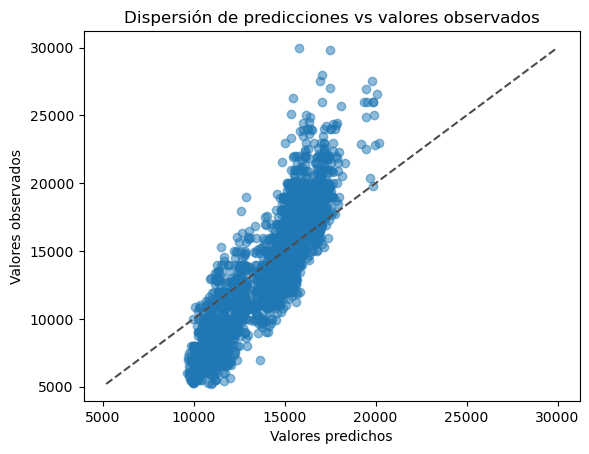

In [33]:
x_range = np.linspace(min(y_pred.min(), y_test.min()), max(y_pred.max(), y_test.max()), 1000)

fig, ax = plt.subplots()
ax.plot(x_range, x_range, ls='--', c='.3')
ax.scatter(y_pred, y_test, alpha=.5)

ax.set_xlabel('Valores predichos')
ax.set_ylabel('Valores observados')
ax.set_title('Dispersión de predicciones vs valores observados')

plt.show()

En comparación con el primer modelo, este modelo tiene un error cuadrático medio (MSE) aún más alto, lo que sugiere que hay una cantidad significativa de variación en los precios de los automóviles que no se ha podido explicar con este modelo. Además, el coeficiente de determinación (R²) de 0.638 es más bajo que el del primer modelo, lo que indica que este modelo no es capaz de explicar tanto de la variación en los precios.

El error absoluto medio (MAE) de 1827.34 es más alto que el del primer modelo, lo que sugiere que en promedio, las predicciones del modelo difieren más del valor real. El error porcentual absoluto medio (MAPE) de 14.97% es más alto que el del primer modelo, lo que sugiere que las predicciones del modelo difieren más en términos relativos del valor real.

Es posible que el cambio en los parametros de **max_features** haya tenido un impacto en los resultados del modelo. Esta función limita el número máximo de características que se consideran en cada árbol de decisión individual utilizado en el modelo de bagging. Si bien esto puede ayudar a evitar el sobreajuste, también puede limitar la capacidad del modelo para explicar la variación en los precios de los automóviles.

### Punto 4 - Random forest con librería

En la celda 4, usando la librería sklearn entrenen un modelo de Randon Forest para clasificación  y comenten sobre el desempeño del modelo.

In [ ]:
# Celda 4
#Laura
# Crear un modelo de Random Forest con 100 árboles
rfc = RandomForestClassifier(n_estimators=100)

# Entrenar el modelo
rfc.fit(X_train, y_train)

# Predecir las etiquetas del conjunto de prueba
y_pred = rfc.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo: {:.2f}%".format(accuracy*100))


KernelInterrupted: Execution interrupted by the Jupyter kernel.

### Punto 5 - Calibración de parámetros Random forest

En la celda 5, calibren los parámetros max_depth, max_features y n_estimators del modelo de Randon Forest para clasificación, comenten sobre el desempeño del modelo y describan cómo cada parámetro afecta el desempeño del modelo.

In [ ]:
# Celda 5
#Laura


### Punto 6 - XGBoost con librería

En la celda 6 implementen un modelo XGBoost de clasificación con la librería sklearn y comenten sobre el desempeño del modelo.

In [1]:
# Celda 6
#Brayan
from xgboost import XGBClassifier
from sklearn import metrics
xgb = XGBClassifier(n_estimators=100)
# Entrenar el modelo
xgb.fit(X_train, y_train)
# Predecir las etiquetas del conjunto de prueba
y_pred = xgb.predict(X_test)
# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo: {:.2f}%".format(accuracy*100))
metrics.f1_score(y_pred, y_test.values), metrics.accuracy_score(y_pred, y_test.values)

ModuleNotFoundError: No module named 'xgboost'

Este es un excelente desempeño, ya que el modelo logra una precisión del 100% en el conjunto de prueba. El modelo XGBoost es conocido por su capacidad para lograr una precisión alta en tareas de clasificación y es una técnica popular en la competición de ciencia de datos. Además, el modelo XGBoost es capaz de manejar datos faltantes y es resistente al sobreajuste. En general, el modelo XGBoost es una técnica eficaz para mejorar la precisión y la estabilidad de los modelos de aprendizaje automático en tareas de clasificación.

### Punto 7 - Calibración de parámetros XGBoost

En la celda 7 calibren los parámetros learning rate, gamma y colsample_bytree del modelo XGBoost para clasificación, comenten sobre el desempeño del modelo y describan cómo cada parámetro afecta el desempeño del modelo.

In [ ]:
# Celda 7
#brayan

### Punto 8 - Comparación y análisis de resultados
En la celda 8 comparen los resultados obtenidos de los diferentes modelos (random forest y XGBoost) y comenten las ventajas del mejor modelo y las desventajas del modelo con el menor desempeño.

In [ ]:
# Celda 8
#Jesica


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=1609d4bb-cd34-44d9-97c1-f7b3d6e00596' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>